In [60]:
library('readr')
library('dplyr')
library('xts')
library('repr')
source('~/current/GitHub/climate_tools/spei.r')


In [61]:
# Sev met data
path <- '/home/greg/data/rawdata/Sevilleta/'
file <- 'Met_all_gapfill072217.csv'

sevdf <- read_csv(paste(path,file, sep=''))
head(sevdf)
tail(sevdf)
colnames(sevdf)


Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_integer(),
  Date = col_character(),
  Month = col_integer(),
  Day = col_integer(),
  Year = col_integer(),
  Sta = col_integer(),
  Solar_Rad = col_integer(),
  Avg_Soil_Temp = col_integer(),
  Max_Soil_Temp = col_integer(),
  Min_Soil_Temp = col_integer(),
  Jul_Day = col_integer()
)
See spec(...) for full column specifications.


X1,Date,Month,Day,Year,Sta,Avg_Temp,Max_Temp,Min_Temp,Avg_RH,⋯,Avg_Wind_Dir,Solar_Rad,Avg_Soil_Temp,Max_Soil_Temp,Min_Soil_Temp,Jul_Day,Max_Tempfill,Min_Tempfill,Avg_Tempfill,VPD
6313,1/1/1992,1,1,1992,1,0.8,6.2,-4.6,72.4,⋯,6.3,175,1831,2385,393,11688,6.2,-4.6,0.8,0.16430387
6314,1/2/1992,1,2,1992,1,-0.2,5.8,-6.2,68.8,⋯,348.9,200,1036,2327,362,11689,5.8,-6.2,-0.2,0.16824419
6315,1/3/1992,1,3,1992,1,-3.6,0.0,-7.1,80.9,⋯,9.7,1511,241,808,344,11690,0.0,-7.1,-3.6,0.09349320
6316,1/4/1992,1,4,1992,1,4.0,9.6,-1.7,70.3,⋯,221.9,2108,1810,2405,353,11691,9.6,-1.7,4.0,0.22898151
6317,1/5/1992,1,5,1992,1,2.8,10.1,-4.5,80.9,⋯,355.3,53,1861,2418,386,11692,10.1,-4.5,2.8,0.14094808
6318,1/6/1992,1,6,1992,1,5.7,11.3,0.0,90.1,⋯,217.8,1988,2220,2449,1959,11693,11.3,0.0,5.7,0.08284795


X1,Date,Month,Day,Year,Sta,Avg_Temp,Max_Temp,Min_Temp,Avg_RH,⋯,Avg_Wind_Dir,Solar_Rad,Avg_Soil_Temp,Max_Soil_Temp,Min_Soil_Temp,Jul_Day,Max_Tempfill,Min_Tempfill,Avg_Tempfill,VPD
88889,12/26/2016,12,26,2016,50,0.7,7.1,-5.7,0.0,⋯,-999,307,1018,2413,254,20814,7.1,-5.7,0.7,Inf
88890,12/27/2016,12,27,2016,50,3.0,11.8,-5.7,0.0,⋯,-999,283,1060,2487,267,20815,11.8,-5.7,3.0,Inf
88891,12/28/2016,12,28,2016,50,6.1,13.6,-1.5,0.0,⋯,-999,2156,1829,2456,313,20816,13.6,-1.5,6.1,Inf
88892,12/29/2016,12,29,2016,50,3.6,8.4,-1.2,0.0,⋯,-999,2041,1813,2400,351,20817,8.4,-1.2,3.6,Inf
88893,12/30/2016,12,30,2016,50,2.8,9.7,-4.1,0.0,⋯,-999,58,1812,2457,282,20818,9.7,-4.1,2.8,Inf
88894,12/31/2016,12,31,2016,50,5.2,10.4,0.1,7.2,⋯,-999,2004,2212,2541,1214,20819,10.4,0.1,5.2,89.32


[1] "X1"                   "Date"                 "Month"               
 [4] "Day"                  "Year"                 "Sta"                 
 [7] "Avg_Temp"             "Max_Temp"             "Min_Temp"            
[10] "Avg_RH"               "Precip"               "Avg_VP"              
[13] "Avg_Wind_SP"          "Avg_Resultant_WindSP" "Avg_Wind_Dir"        
[16] "Solar_Rad"            "Avg_Soil_Temp"        "Max_Soil_Temp"       
[19] "Min_Soil_Temp"        "Jul_Day"              "Max_Tempfill"        
[22] "Min_Tempfill"         "Avg_Tempfill"         "VPD"

In [62]:
#Soccoro data
soccfname <- 'SPEI_out/socorro_1900_to_2070_spei.csv'
soccdf <- read_csv(soccfname)
soccdfx <- as.xts(soccdf[,c('cwdiff','spei6mo_fc')], order.by=as.Date(as.yearmon(soccdf$Date), frac=1))
names(soccdfx) <- c('cwdiff_socc','spei6mo_fc_socc')
head(soccdfx)
tail(soccdfx)

Parsed with column specification:
cols(
  Date = col_character(),
  cwdiff = col_double(),
  spei6mo = col_double(),
  spei12mo = col_double(),
  spei6mo_5Ymean = col_double(),
  spei6mo_adj5Ymean = col_double(),
  spei6mo_5Ysd = col_double(),
  spei6mo_adj5Ysd = col_double(),
  spei6mo_adj5Ycv = col_double(),
  spei6mo_fc = col_double()
)


           cwdiff_socc spei6mo_fc_socc
1900-01-31   33.901450              NA
1900-02-28   10.015018              NA
1900-03-31   -4.887078              NA
1900-04-30  -22.734462              NA
1900-05-31  -70.529805              NA
1900-06-30 -121.886952        1.081059

           cwdiff_socc spei6mo_fc_socc
2070-07-31  -145.53691       -1.495026
2070-08-31  -155.19298       -2.268585
2070-09-30   -83.71195       -2.048839
2070-10-31   -57.72470       -1.890277
2070-11-30   -41.92002       -2.360107
2070-12-31    -2.60413       -2.384542

In [63]:
sevstations <- unique(sevdf$Sta)
sevstations

[1]  1 40 41 42 43 44 45 48 49 50

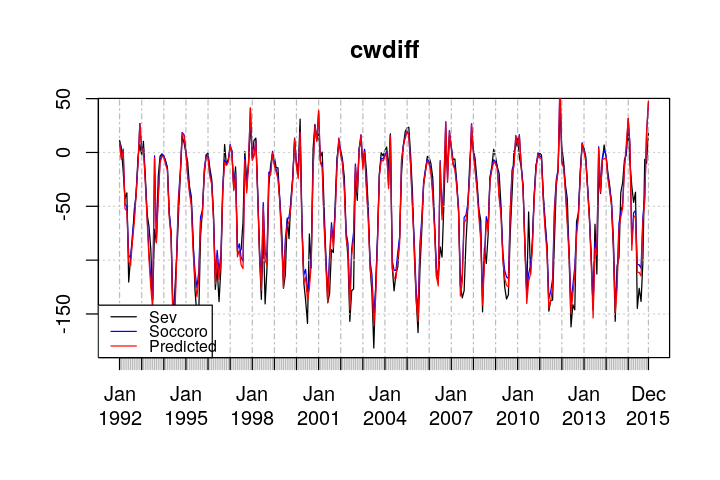

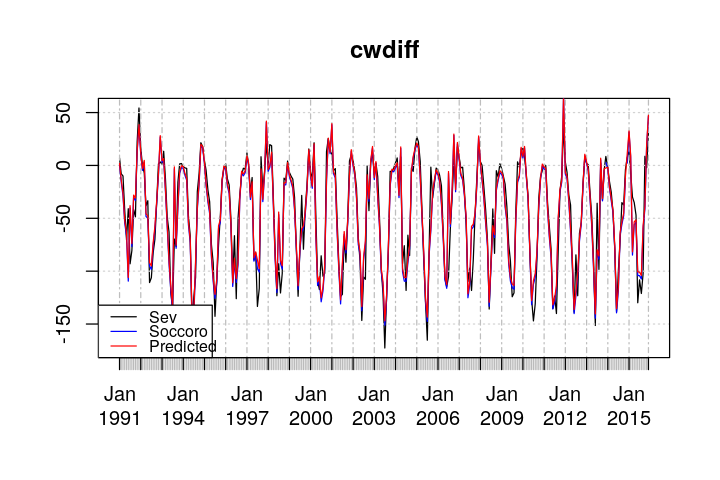

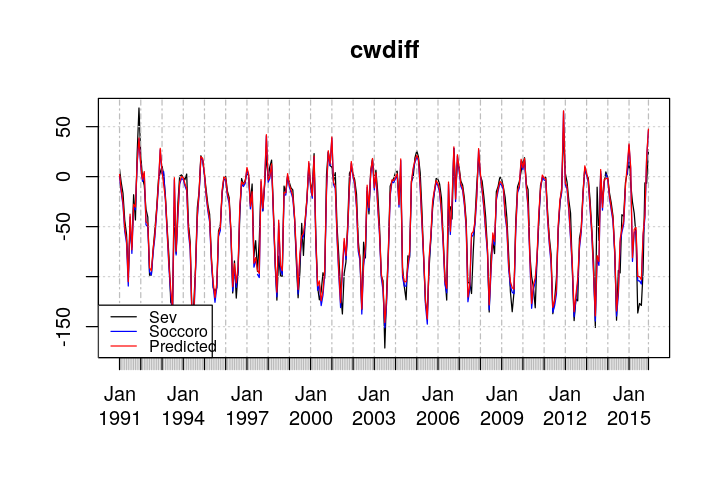

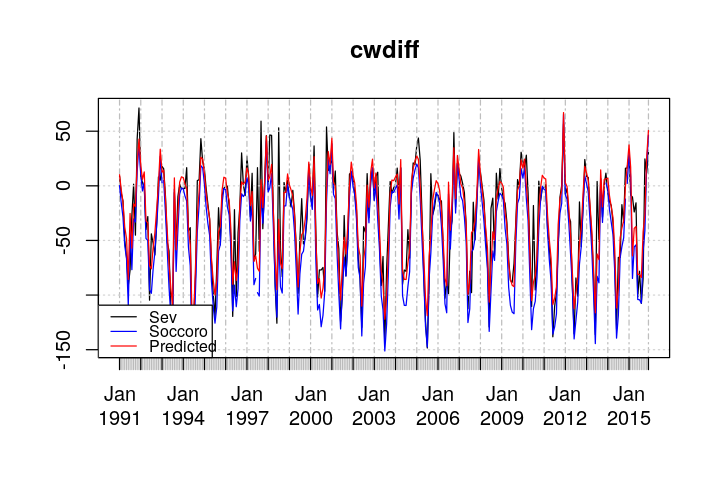

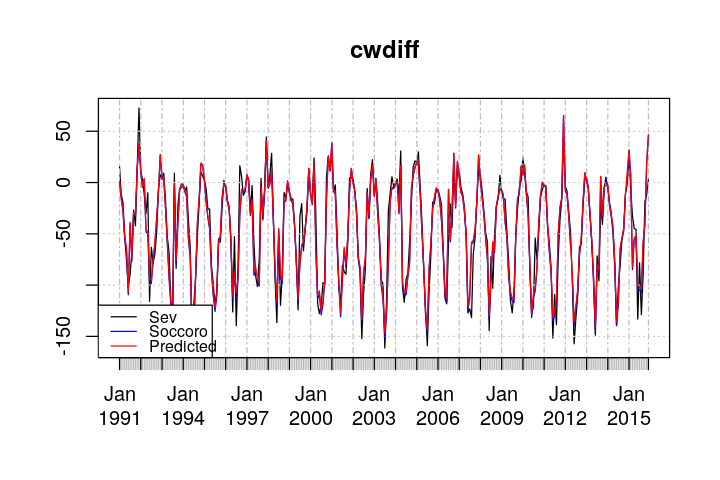

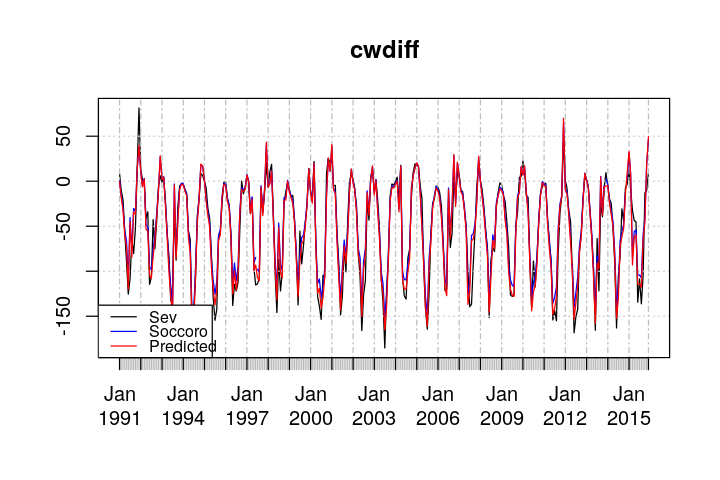

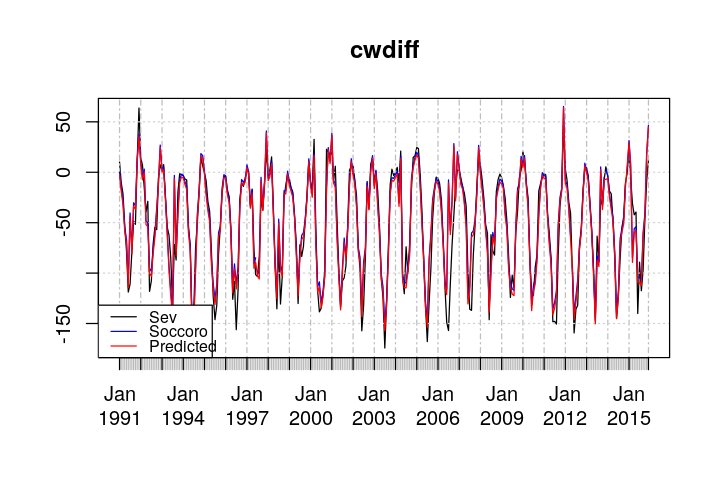

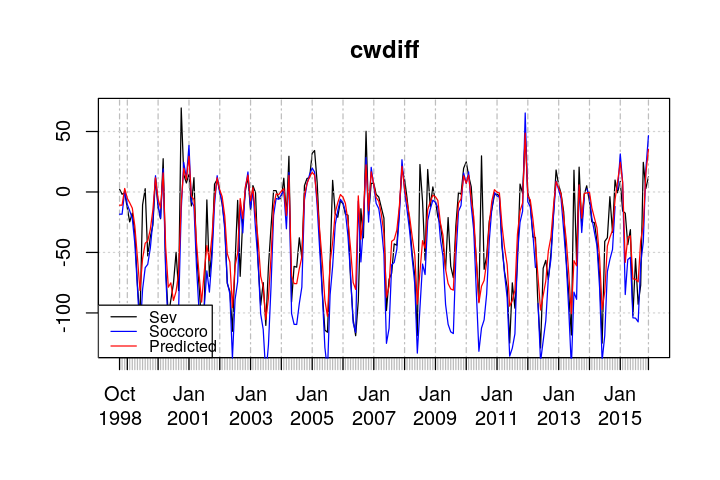

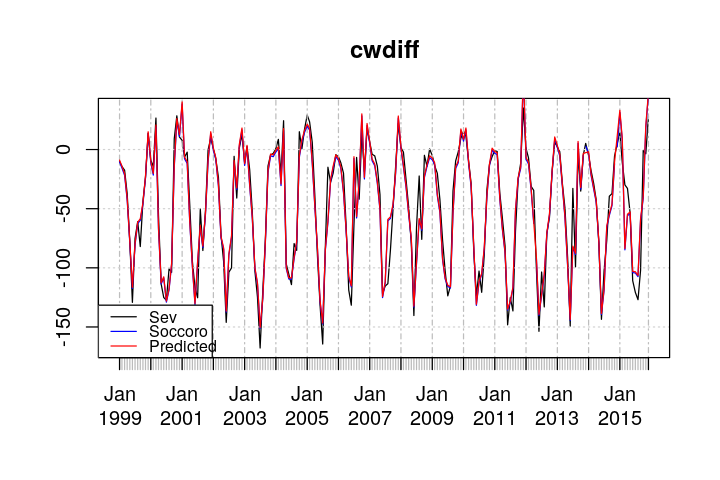

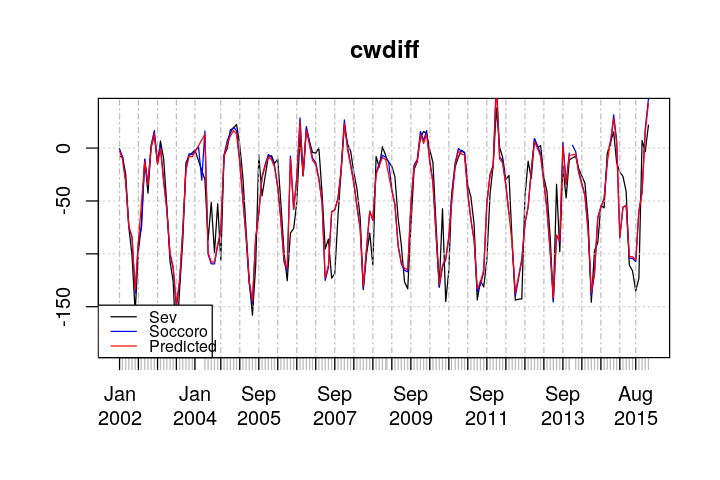

In [64]:
options(repr.plot.width=6, repr.plot.height=4)

for (s in sevstations){
    df <- subset(sevdf, Sta==s)
    # Lots of missing temp data prior to 1991 - remove
    cond <- (as.Date(df$Date, "%m/%d/%Y") > '1991-1-1' & 
             !is.na(df$Avg_Temp) & as.Date(df$Date, "%m/%d/%Y") < '2016-1-1')
    df <- subset(df, cond)
    # Now make it an xts object
    dfx <- as.xts(df[,c('Sta','Avg_Temp', 'Avg_Tempfill','Precip')], order.by=as.Date(df$Date, "%m/%d/%Y"))
    head(dfx)
    lat <- 34.32
    prec_mm <- apply.monthly(dfx$Precip, FUN=sum, na.rm=TRUE)
    tmean_c <- apply.monthly(dfx$Avg_Temp, FUN=mean, na.rm=TRUE)
    tmean_cf <- apply.monthly(dfx$Avg_Tempfill, FUN=mean, na.rm=TRUE)
    
    # Get pet with thornthwaite - since we're missing wind I don't think penman is an option
    pet <- xts(as.vector(thornthwaite(tmean_cf, lat)), order.by=index(tmean_cf))
    cwdiff <- prec_mm - pet
    names(cwdiff) <- 'cwdiff_sev'
    plot(cwdiff)
    # get the cwdiff for socorro for the same period and plot it
    start <- index(cwdiff)[1]
    end <- index(cwdiff)[dim(cwdiff)[1]]
    socc <- soccdfx[paste(start,'/',end, sep='')]
    lines(socc$cwdiff_socc,col='blue')
    # Create a model predicting sev site from Socorro - this could be improved
    dat <- merge(cwdiff, socc$cwdiff_socc)
    model <- lm(cwdiff_sev ~ cwdiff_socc, data=dat)
    cwdiff_sev_pred <- predict(model)
    cwdiff_sev_pred <- as.xts(cwdiff_sev_pred, as.Date(names(cwdiff_sev_pred)))

    # Plot the predicted data
    lines(cwdiff_sev_pred,col='red')
    legend(x='bottomleft', legend=c('Sev', 'Soccoro', 'Predicted'), lty=1, col=c('black', 'blue','red'),
           y.intersp=1.7, cex=.8)
    
    # Now predict future cwdiff using the model and merge present and
    # forecasted cwdiff onto the soccdfx dataframe
    socc_dat <- soccdfx$cwdiff_socc[paste(end+1, '/', sep='')]
    fcst_sev <- predict(model, socc_dat)
    fcst_sev <- as.xts(fcst_sev, as.Date(names(fcst_sev)))
    cwdiff_fcst <- rbind(cwdiff, fcst_sev)
    names(cwdiff_fcst) <- paste('cwdiff', s, sep='_')

    soccdfx <- merge(soccdfx, cwdiff_fcst)
}


[1] 864   3
[1] 864   3
[1] 864   3
[1] 2592    3


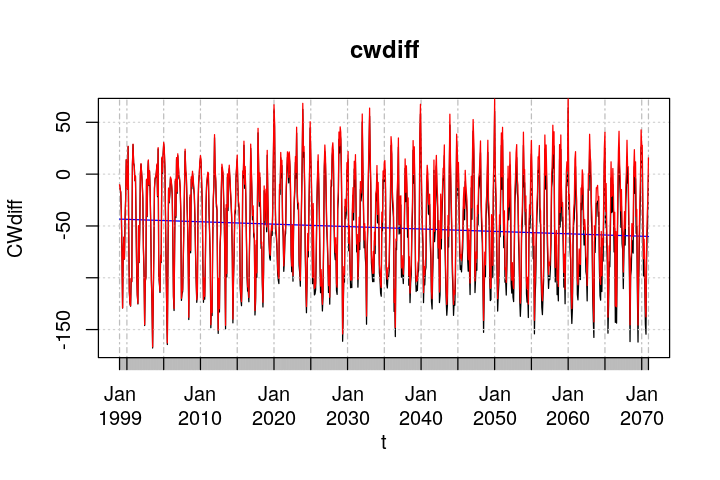

[1] 826   3
[1] 826   3
[1] 826   3
[1] 5070    3


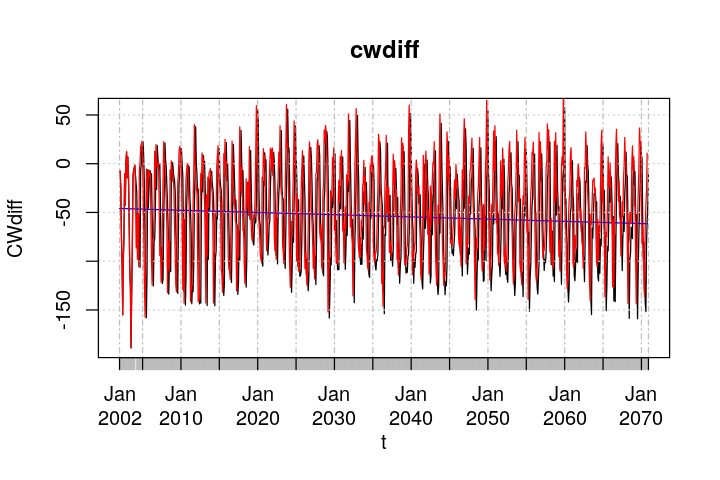

In [65]:
library(forecast)

count <- 1
cwd <- list()

selstations <- c(49,50)
for (s in selstations){
    sevd <- subset(sevdf, Sta==s)
    mindate <- min(as.Date(sevd$Date, "%m/%d/%Y"))
    df <- soccdfx[paste(mindate, '/', sep='')]
    # Get cwdiff and remove na values
    cwdiff <- na.omit(df[,paste('cwdiff', s, sep='_')])
    names(cwdiff) <- 'cwdiff'
    # Fit a trend model to the data, then detrend timeseries
    cw_ts <- ts(cwdiff, frequency=12,
                start=c(as.numeric(strftime(mindate, format = "%Y")),
                        as.numeric(strftime(mindate, format = "%m"))))
    cw.fit <- tslm(cw_ts ~ trend)
    cwdiff_detrend <- as.xts(cw_ts - fitted(cw.fit) + coef(cw.fit)[1])
    # The trend (fitted) is the mean-only forecast (no variance)
    cwdiff_trendonly <- as.xts(fitted(cw.fit))
    # Make indexes match cwdiff
    index(cwdiff_detrend) <- as.Date(as.yearmon(index(cwdiff_detrend)), frac=1)
    names(cwdiff_detrend) <- 'cwdiff'
    index(cwdiff_trendonly) <- as.Date(as.yearmon(index(cwdiff_trendonly)), frac=1)
    names(cwdiff_trendonly) <- 'cwdiff'
    # Plot cwdiff, trend, and detrended series
    plot(cwdiff, ylab="CWdiff", xlab="t")
    lines(cwdiff_trendonly, col='blue')
    lines(cwdiff_detrend, col='red')
    #print(head(cwdiff))
    # Make dataframes
    cwd <- data.frame(date=index(cwdiff), cwdiff, row.names=NULL)
    cwd$Sta <- as.character(s)
    cwd_d <- data.frame(date=index(cwdiff_detrend), cwdiff_detrend, row.names=NULL)
    cwd_d$Sta <- paste(s, 'detrend', sep='_')
    cwd_to <- data.frame(date=index(cwdiff_trendonly), cwdiff_trendonly, row.names=NULL)
    cwd_to$Sta <- paste(s, 'trendonly', sep='_')
    if(count==1){
        cwd_out <- rbind(cwd, cwd_d)
        cwd_out <- rbind(cwd_out, cwd_to)
        print(dim(cwd))
        print(dim(cwd_d))
        print(dim(cwd_to))
        print(dim(cwd_out))
        fcstlen <- length(cwdiff)
    } else {
        cwd_out <- rbind(cwd_out, cwd)
        cwd_out <- rbind(cwd_out, cwd_d)
        cwd_out <- rbind(cwd_out, cwd_to)
        print(dim(cwd))
        print(dim(cwd_d))
        print(dim(cwd_to))
        print(dim(cwd_out))
    }
    count <- count + 1    
    }

date,cwdiff,Sta
1999-01-31,-10.26043,49
1999-02-28,-14.35813,49
1999-03-31,-17.47935,49
1999-04-30,-37.22919,49
1999-05-31,-78.00829,49
1999-06-30,-129.17382,49


,date,cwdiff,Sta
5065,2070-05-31,-61.47400,50_trendonly
5066,2070-06-30,-61.49297,50_trendonly
5067,2070-07-31,-61.51194,50_trendonly
5068,2070-08-31,-61.53091,50_trendonly
5069,2070-09-30,-61.54988,50_trendonly
5070,2070-10-31,-61.56885,50_trendonly


date,cwdiff,Sta,spei6mo
1999-01-31,-10.26043,49,NA
1999-02-28,-14.35813,49,NA
1999-03-31,-17.47935,49,NA
1999-04-30,-37.22919,49,NA
1999-05-31,-78.00829,49,NA
1999-06-30,-129.17382,49,0.6120519


,date,cwdiff,Sta,spei6mo
5065,2070-05-31,-61.47400,50_trendonly,-1.6472844
5066,2070-06-30,-61.49297,50_trendonly,-1.5863515
5067,2070-07-31,-61.51194,50_trendonly,-1.2443646
5068,2070-08-31,-61.53091,50_trendonly,-0.8266893
5069,2070-09-30,-61.54988,50_trendonly,-0.5327624
5070,2070-10-31,-61.56885,50_trendonly,-0.2649694


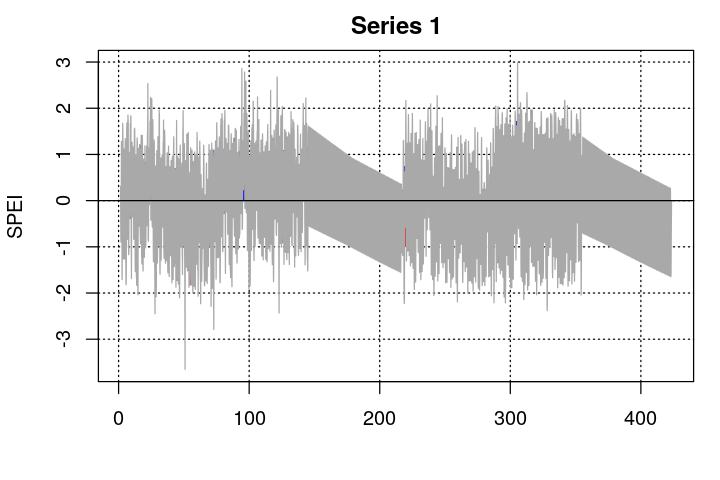

In [66]:
# Get spei tools
source('~/current/GitHub/climate_tools/spei.r')

head(cwd_out)
tail(cwd_out)

spei <- get_spei(cwd_out$cwdiff)

cwd_out$spei6mo <- as.vector(spei$fitted)

head(cwd_out)
tail(cwd_out)

outfile <- 'sev_forecasts_to2070_spei'
#write.zoo(new, file = paste('output_data/Sev_SPEI/', outfile, '.csv', sep=''),
#          index.name = "Date", sep=',', row.names = FALSE, col.names=TRUE)
write.table(cwd_out, file = paste('SPEI_out/', outfile, '.csv', sep=''), sep=',', row.names=FALSE)

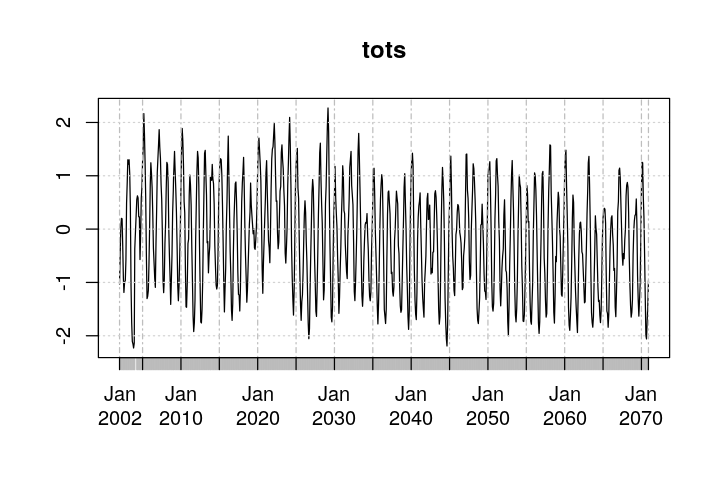

In [67]:
to <- subset(cwd_out, Sta=='50')
tots <- as.xts(to$spei6mo, order.by=as.Date(to$date))
plot(tots)

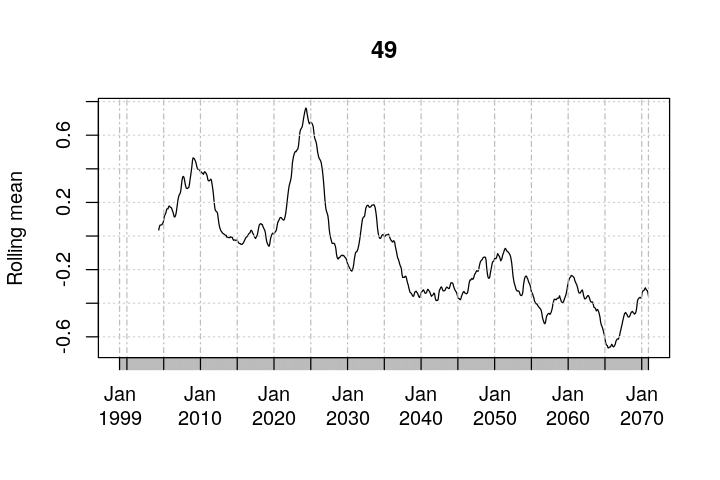

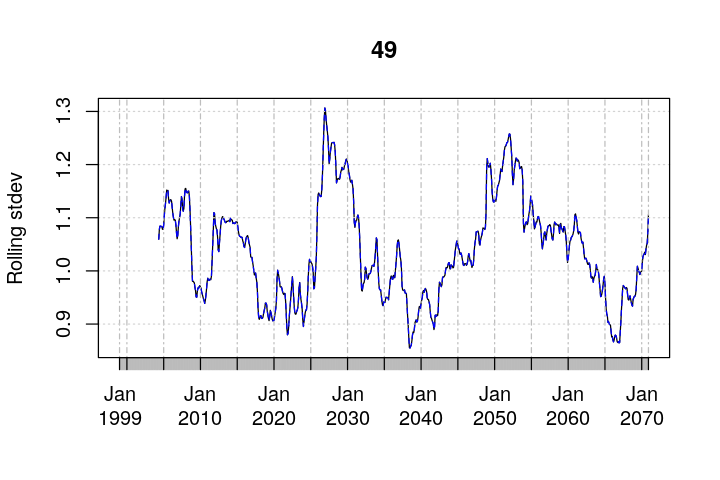

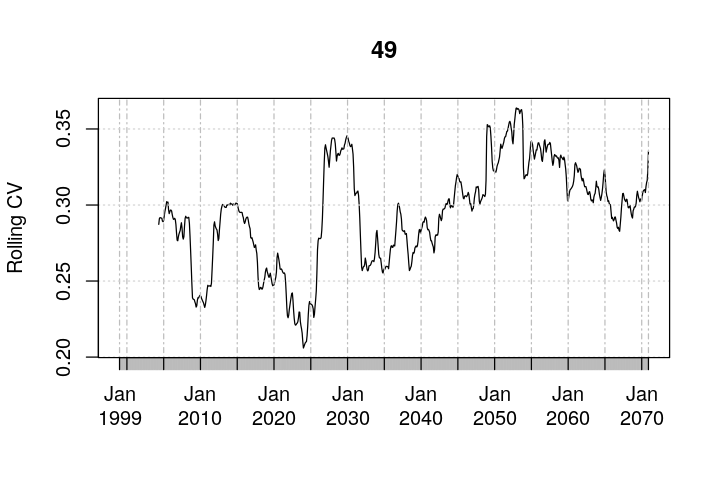

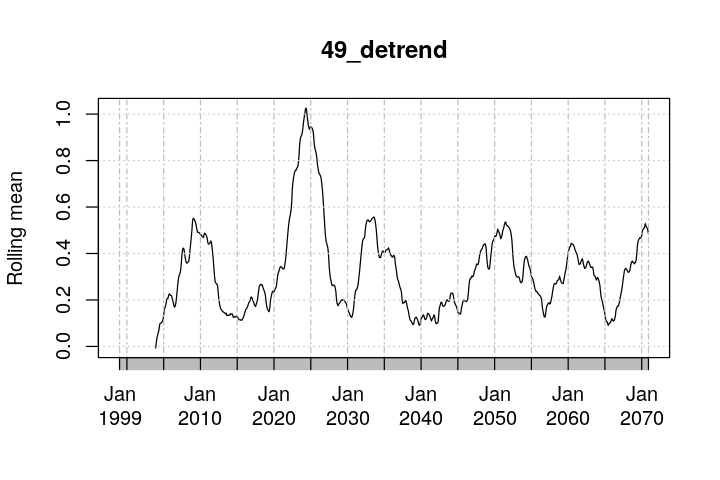

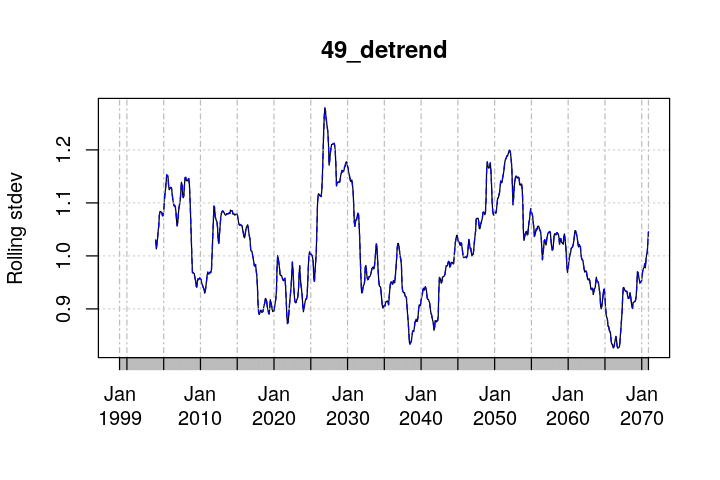

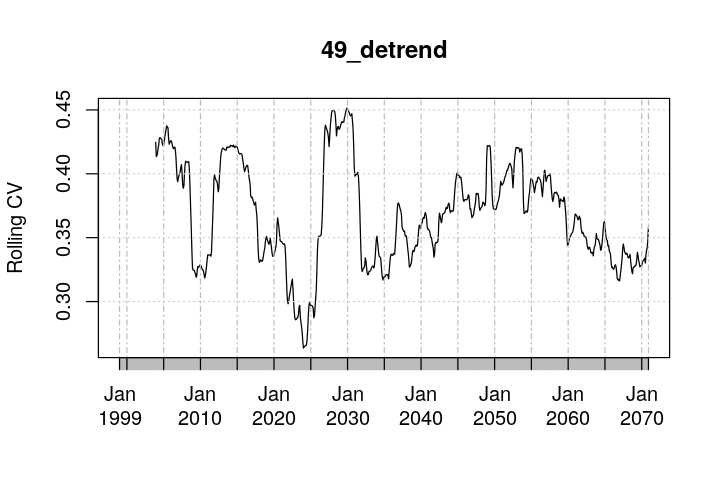

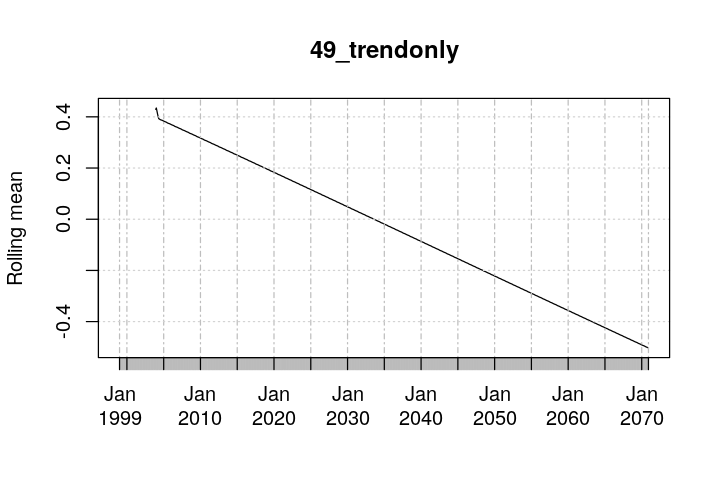

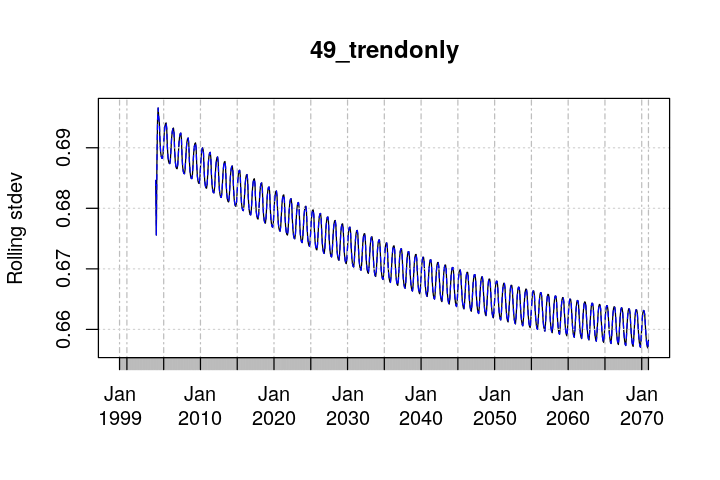

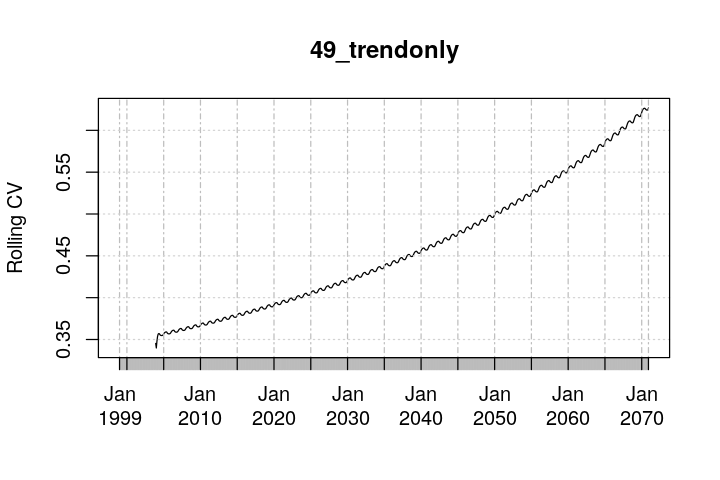

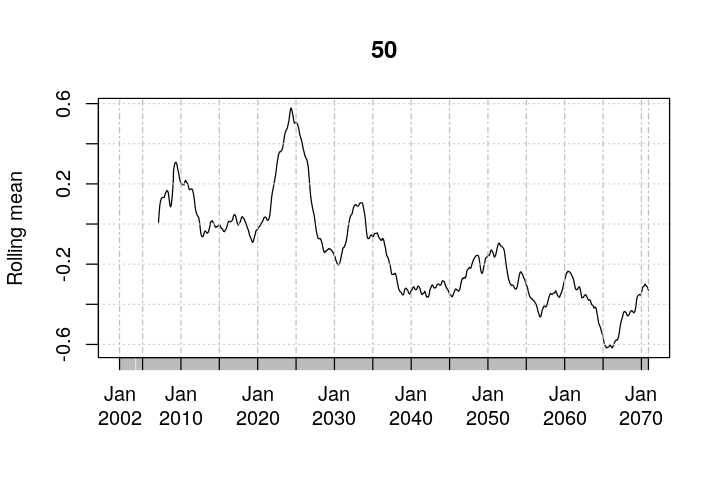

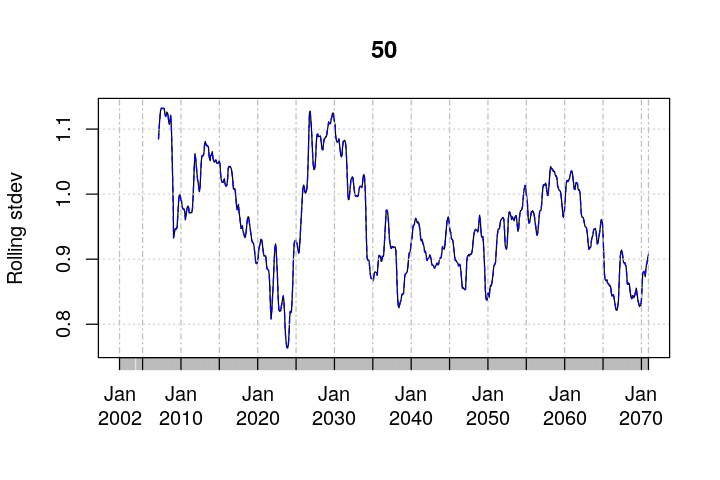

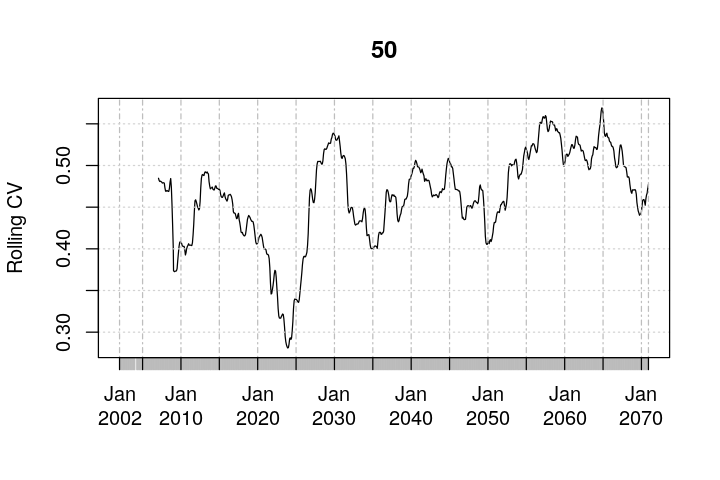

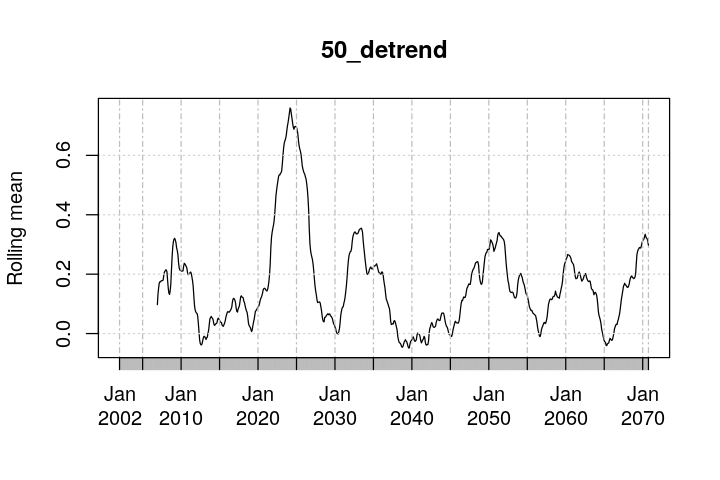

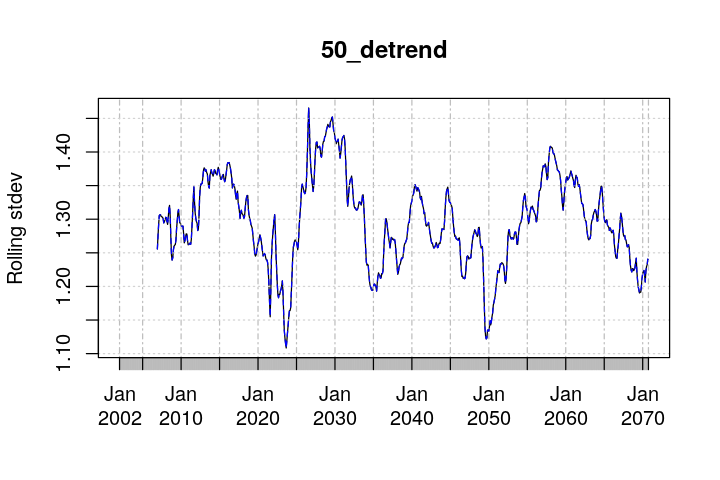

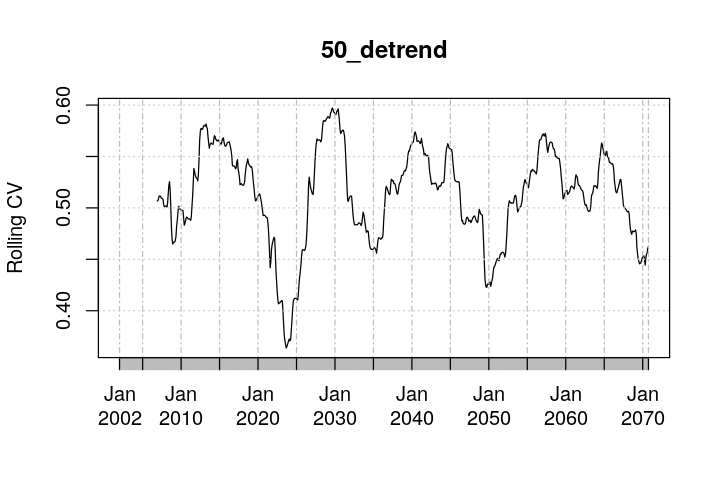

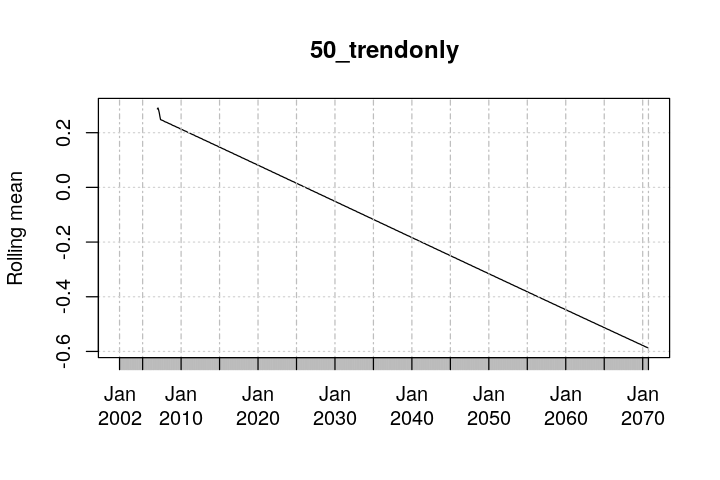

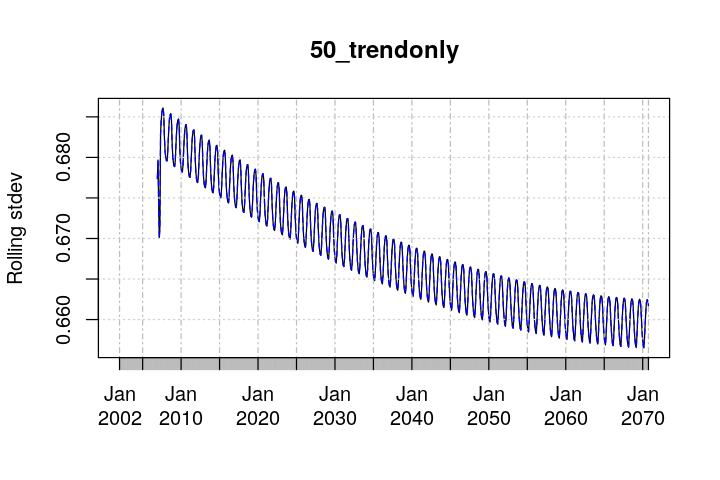

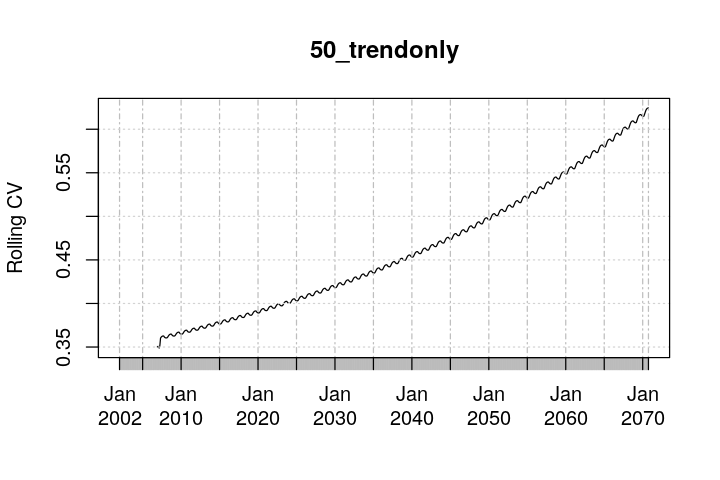

In [68]:
# Get spei tools
source('~/current/GitHub/climate_tools/ts_variability_trends.r')

tslist <- c('49', '49_detrend', '49_trendonly', '50', '50_detrend', '50_trendonly')
for (ts in tslist){
    subs <- subset(cwd_out, Sta==ts)
    spei <- as.xts(subs$spei6mo, order.by=as.Date(subs$date))
    cv <- get_rolling_CV(spei, 5*12, positivize=TRUE, plots=TRUE, site=ts)
}